In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely as sl

import spideymaps as sm
from spideymaps import Spideymap, SpideyAtlas, render_map

In [2]:
from spideymaps import calc_midline, calc_outline

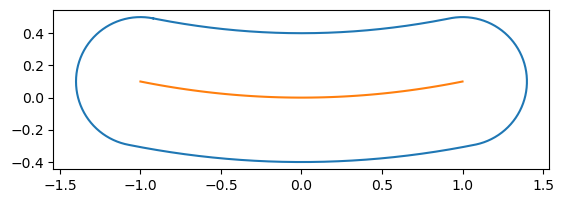

In [12]:
xl = -1
xr = 1
a0 = 0
a1 = 0
a2 = 0.1
r = 0.4

x, y = calc_outline(xl, xr, a0=a0, a1=a1, a2=a2, r=0.4)
y_mid = calc_midline(np.linspace(xl, xr, num=50), a0=a0, a1=a1, a2=a2)

plt.figure()
plt.plot(x, y)
plt.plot(np.linspace(-1, 1, num=50), y_mid)
plt.gca().set_aspect('equal')

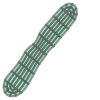

In [2]:
label_file = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms\2023-08-05_fcl136_20ms_001_seg.npy"
labels = np.load(label_file, allow_pickle=True).item()['masks']
mask = labels == 1

locs_file = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms\2023-08-07 palmari output\2023-08-05_fcl136_20ms_001.locs"
locs = pd.read_csv(locs_file, index_col=0)
locs['y_px'] = locs['x'] / 0.049
locs['x_px'] = locs['y'] / 0.049

map = Spideymap(bimage=mask, coords=locs, xcol='x_px', ycol='y_px')
map.make_grid(radius=10, n_shells=3, n_cols=8, n_phi=(1,3,5,7))
sl.GeometryCollection(list(map.polygons.values()))

In [3]:
map.count()

In [4]:
atlas = SpideyAtlas(maps=(map, map), map_names=('numero1', 'numero2'))

In [5]:
atlas.sum()
atlas.sum(data_key='areas')
atlas.add_symmetric_elements(data_key='counts_sum')
atlas.add_symmetric_elements(data_key='areas_sum')
atlas.density(num_key='counts_sum_sym', den_key='areas_sum_sym')
atlas.data.keys()

dict_keys(['counts_sum', 'areas_sum', 'counts_sum_sym', 'areas_sum_sym', 'counts_sum_sym_per_areas_sum_sym'])

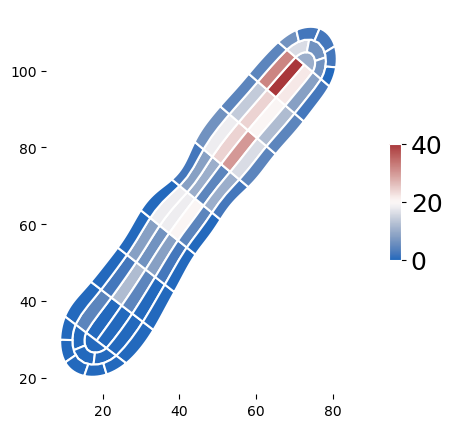

In [6]:
fig, ax = render_map(
    atlas.maps['numero1'].polygons, 
    atlas.data['counts_sum'], 
    vmin=None, 
    vmax=None, 
    cmap=None)
# ax.plot(map.coords['x_px'], map.coords['y_px'], 'o', mec='none', c='black', alpha=0.75, ms=2)

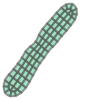

In [7]:
map = Spideymap(bimage=mask)
map.make_grid(radius=10, n_shells=2, n_cols=13, n_phi=(2,5))
sl.GeometryCollection(list(map.polygons.values()))

In [8]:
from glob import glob
from os.path import join

In [70]:
labels_folder = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms"
labels_pattern = r"*.npy"
labels_files = glob(join(labels_folder, labels_pattern))

coords_folder = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms\2023-08-07 palmari output"
coords_pattern = r"*.locs"
coords_files = glob(join(coords_folder, coords_pattern))

maps = []

for i_mov, (label_file, coords_file) in enumerate(zip(labels_files, coords_files)):
    labels = np.load(label_file, allow_pickle=True).item()['masks']
    coords = pd.read_csv(coords_file, index_col=0)
    coords['i_mov'] = i_mov
    n_rois = labels.max()

    for i_roi in range(1, n_rois+1):
        cell_bool = labels == i_roi
        coords_cell = coords[coords['rois']==i_roi].reset_index()
        coords_cell['x_px'] = coords_cell['y'] / 0.049
        coords_cell['y_px'] = coords_cell['x'] / 0.049
        map = Spideymap(bimage=cell_bool, coords=coords_cell, xcol='x_px', ycol='y_px')
        map.make_grid(radius=10, n_shells=5, n_cols=16, n_phi=(1,3,5,7,9))
        map.count()
        maps.append(map)

In [71]:
atlas = SpideyAtlas(maps)

In [72]:
atlas.create_rep_grid(grid_params=dict(radius=10, n_shells=5, n_cols=16, n_phi=(1,3,5,7,9)))

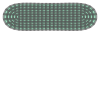

In [73]:
sl.GeometryCollection(list(atlas.rep_grid.values()))

In [74]:
atlas.sum()
atlas.sum(data_key='areas')
atlas.add_symmetric_elements()
atlas.add_symmetric_elements(data_key='areas_sum')
atlas.density(num_key='counts_sum_sym', den_key='areas_sum_sym');

In [75]:
atlas.data.keys()

dict_keys(['counts_sum', 'areas_sum', 'counts_sum_sym', 'areas_sum_sym', 'counts_sum_sym_per_areas_sum_sym'])

In [76]:
len(atlas.rep_grid)

210

In [77]:
len(atlas.data['counts_sum_sym'])

210

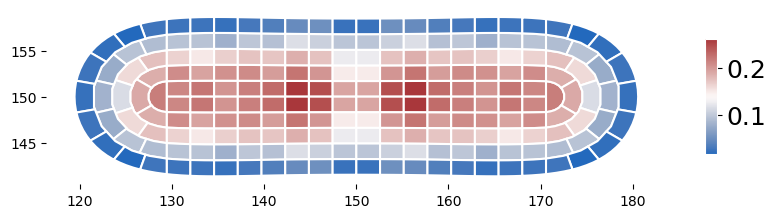

In [83]:
fig, ax = render_map(
    atlas.rep_grid, 
    atlas.data['counts_sum_sym_per_areas_sum_sym'], 
    vmin=None, 
    vmax=None, 
    cmap=None)

In [84]:
import colicoords as cc

ModuleNotFoundError: No module named 'colicoords'

In [85]:
def parabola(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

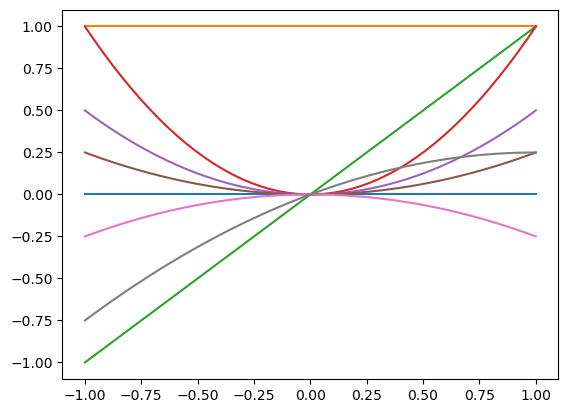

In [93]:
x = np.linspace(-1,1)
plt.figure()
plt.plot(x, parabola(x, 0, 0, 0))
plt.plot(x, parabola(x, 1, 0, 0))
plt.plot(x, parabola(x, 0, 1, 0))
plt.plot(x, parabola(x, 0, 0, 1))
plt.plot(x, parabola(x, 0, 0, 0.5))
plt.plot(x, parabola(x, 0, 0, 0.25))
plt.plot(x, parabola(x, 0, 0, -0.25))
plt.plot(x, parabola(x, 0, 0.5, -0.25))